In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cmath  
from sympy import *
plt.rcParams["figure.figsize"] = (20,3)


# Check data

In [34]:
data = pd.read_csv('Data\EURUSD5.csv')
data['date'] = data['fecha'] + data['hora']
data['timestamp'] = pd.to_datetime(data['date'], format='%Y.%m.%d%H:%M')
data = data[['timestamp', 'close']]
data

,timestamp,close
0,1999-01-14 23:40:00,1.17060
1,1999-01-14 23:45:00,1.17020
2,1999-01-14 23:50:00,1.17050
3,1999-01-14 23:55:00,1.17030
4,1999-01-15 00:00:00,1.17000
...,...,...
1577857,2020-05-11 23:55:00,1.08062
1577858,2020-05-12 00:00:00,1.08047
1577859,2020-05-12 00:05:00,1.08069
1577860,2020-05-12 00:10:00,1.08064


# Aceleration of the price

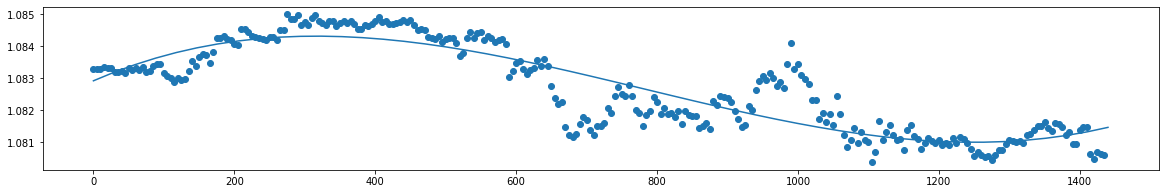

In [172]:
span = 12*24 # 5 min * 12 = 1 hour * 24 = 1 day

x_axis = [t*5 for t in range(len(data['timestamp'][-span:]))] #obtain a subset
model = np.poly1d(np.polyfit(x_axis, data['close'][-span:], 3)) # fit the cubic curve

polyline = np.linspace(0, len(x_axis)*5)
plt.scatter(x_axis, data['close'][-span:])
plt.plot(polyline, model(polyline))
plt.show()

# Velocity of the price (derivate)

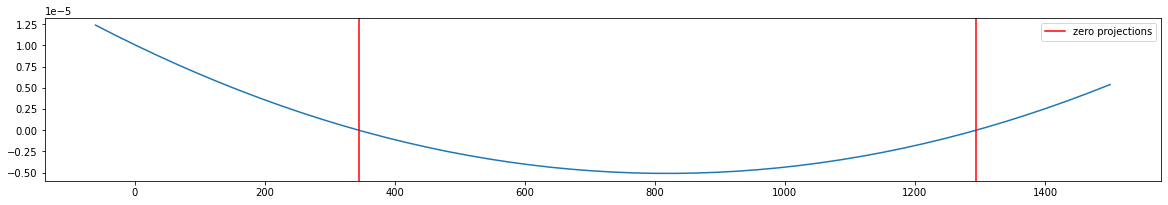

In [207]:
# derivate the model

x = Symbol('x')
f = model[3]*x**3 + model[2]*x**2 + model[1]*x**1 + model[0]
f_prime = f.diff(x)
f_prime = lambdify(x, f_prime)

plt.plot(polyline, f_prime(polyline))

# Identify the change of the direction of the velocity

a = Poly(f.diff(x), x)
a,b,c = a.coeffs()
d = (b**2) - (4*a*c)  
sol1 = (-b-cmath.sqrt(d))/(2*a)  
sol2 = (-b+cmath.sqrt(d))/(2*a)  

#plot

plt.axvline(sol1, color= 'red', label='zero projections')
plt.axvline(sol2, color= 'red')
plt.legend()
plt.show()

# Plot together

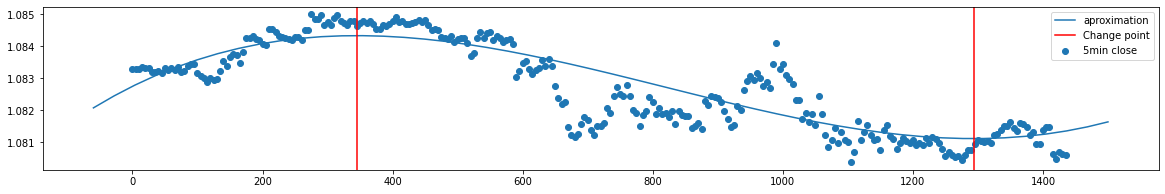

In [209]:
plt.scatter(x_axis, data['close'][-span:], label='5min close')
plt.plot(polyline, model(polyline), label='aproximation')
plt.axvline(sol1, color= 'red', label= 'Change point')
plt.axvline(sol2, color= 'red')
plt.legend()
plt.show()

# Simuation

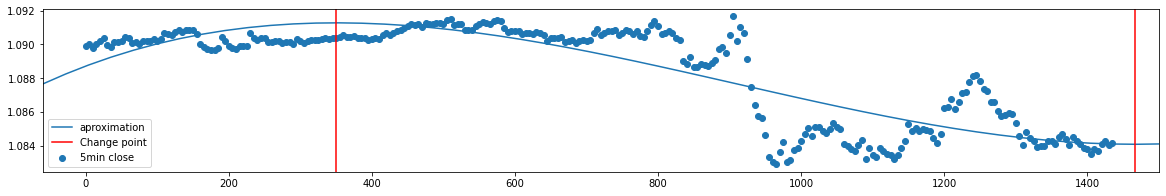

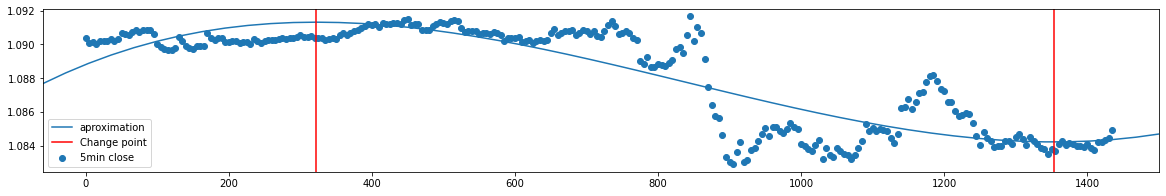

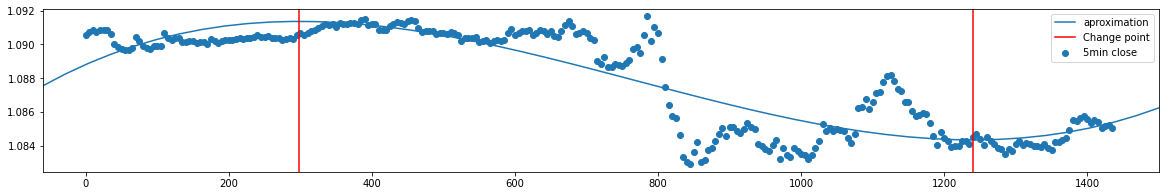

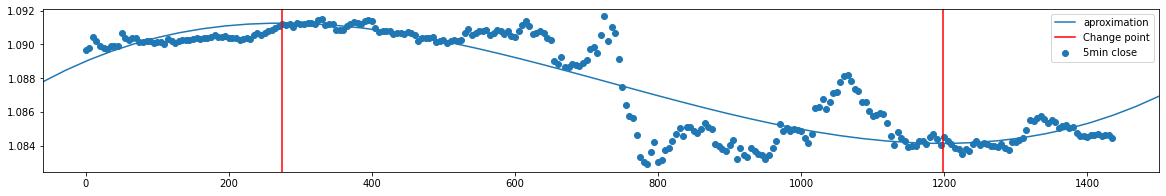

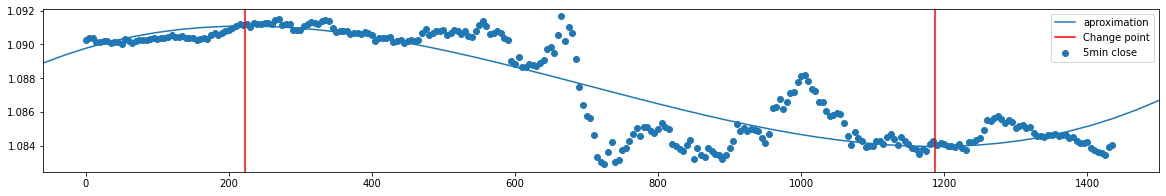

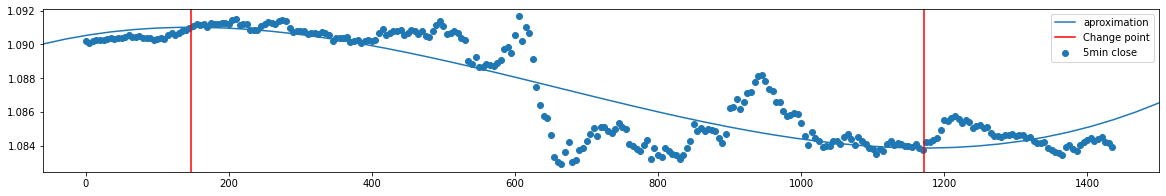

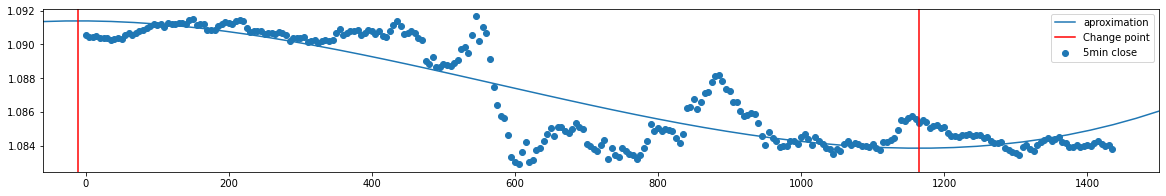

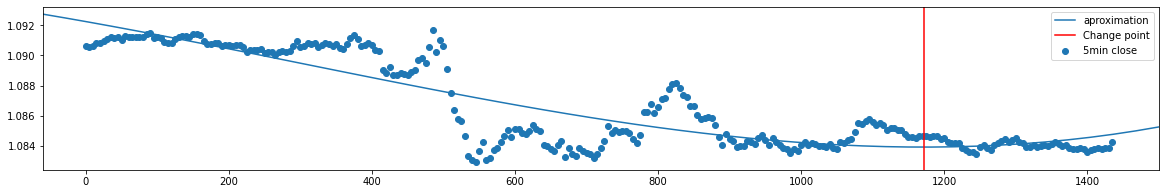

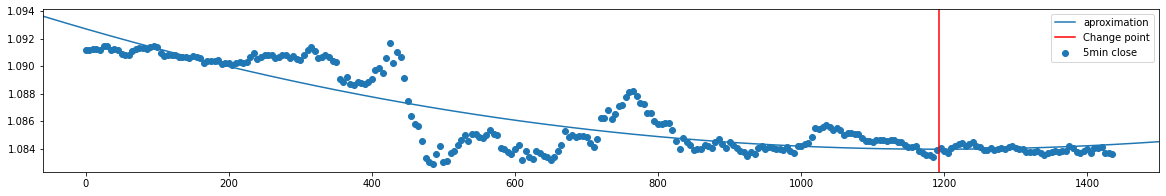

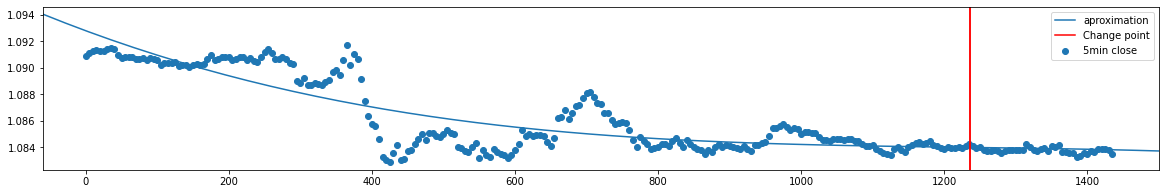

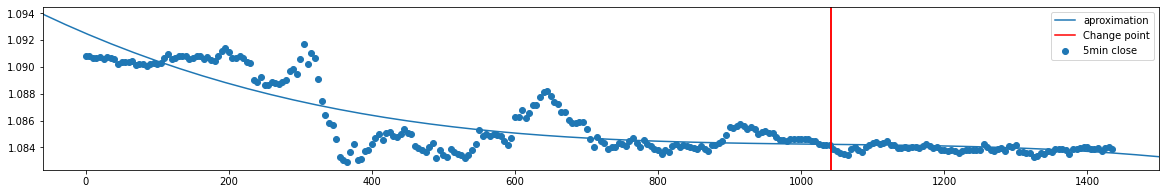

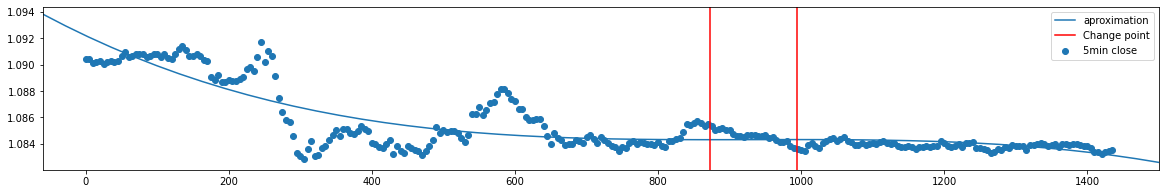

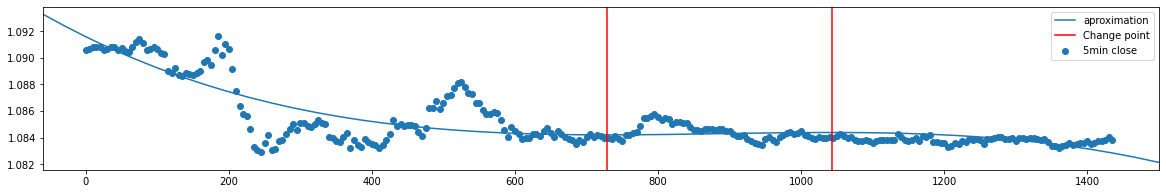

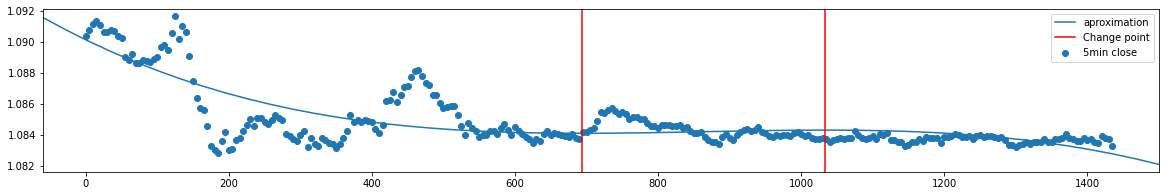

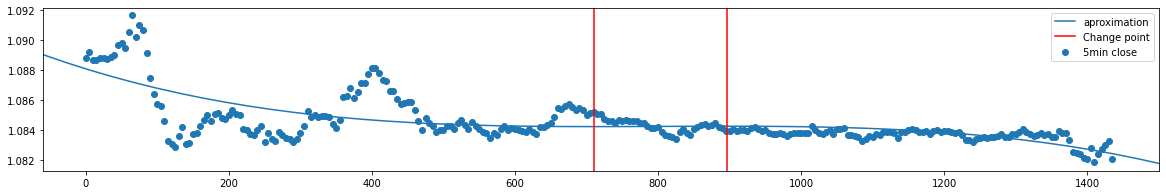

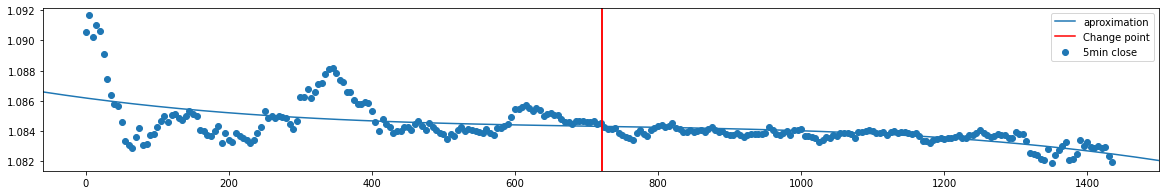

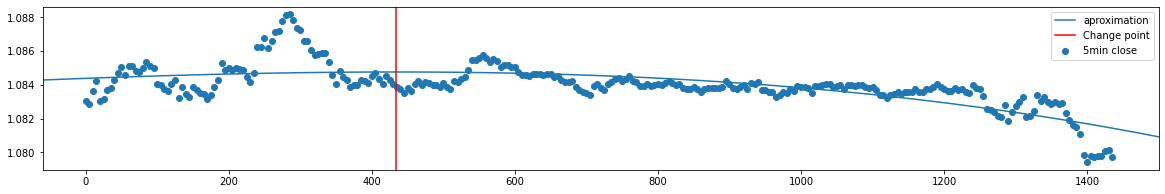

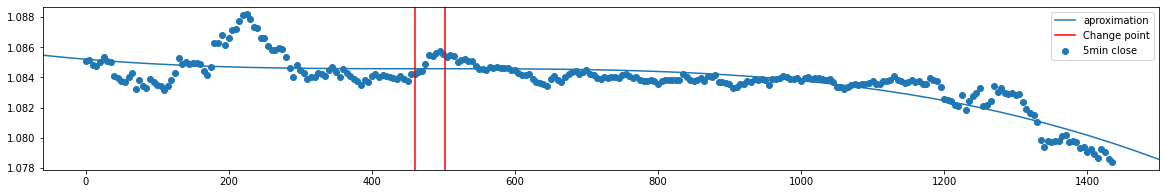

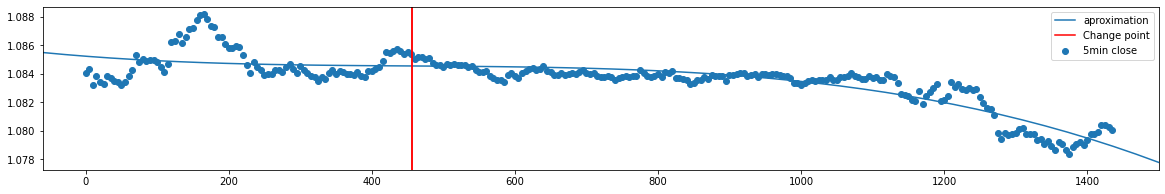

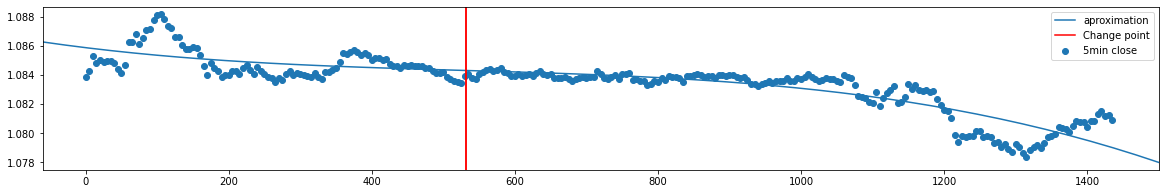

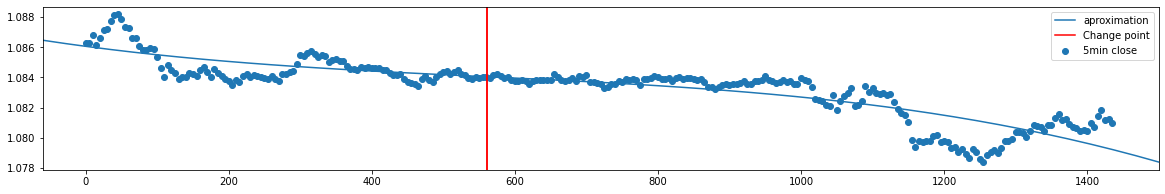

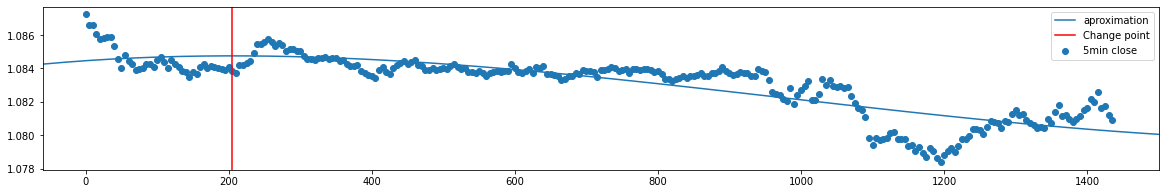

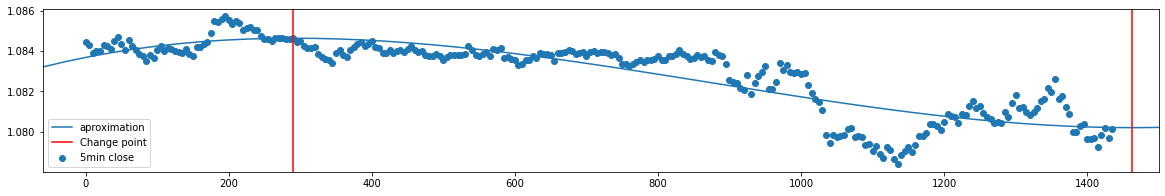

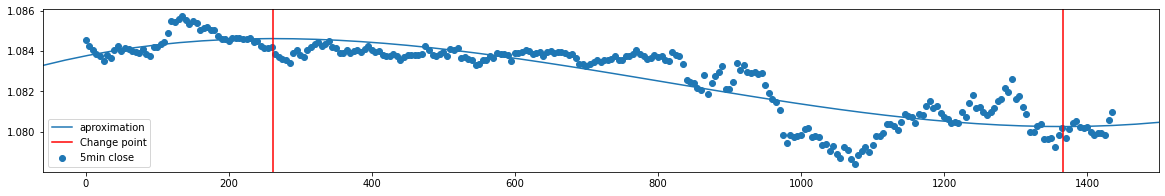

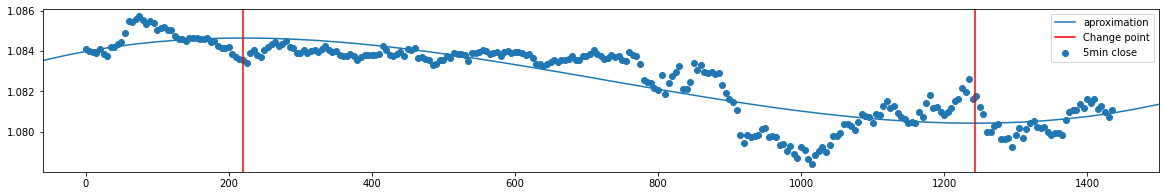

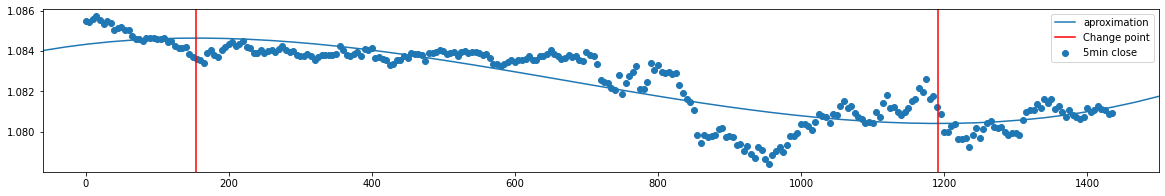

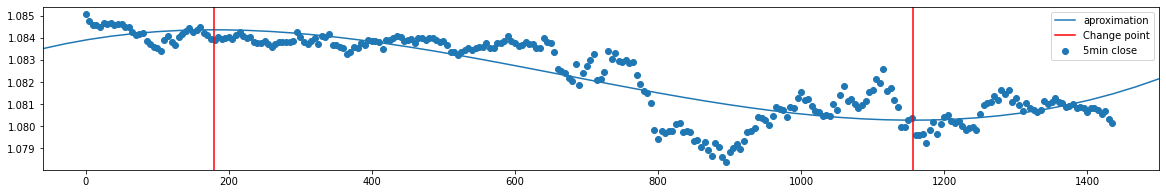

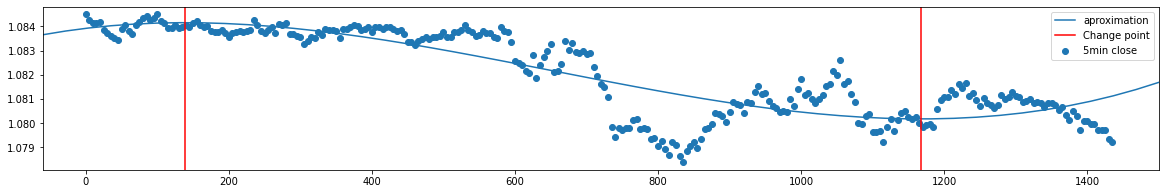

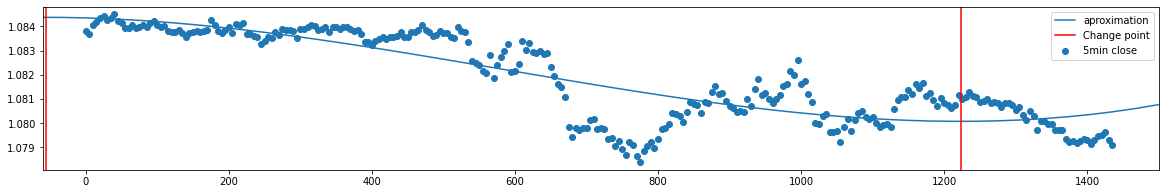

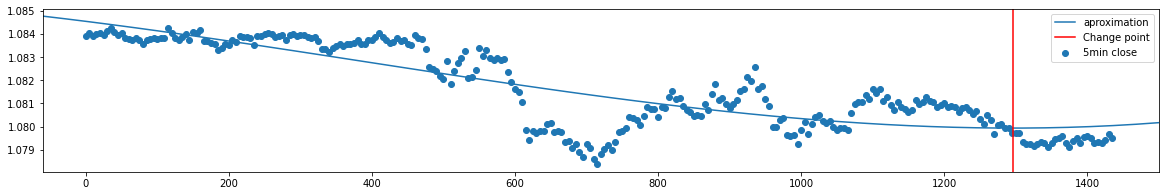

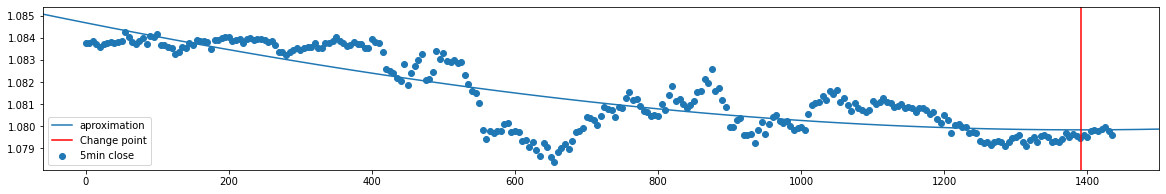

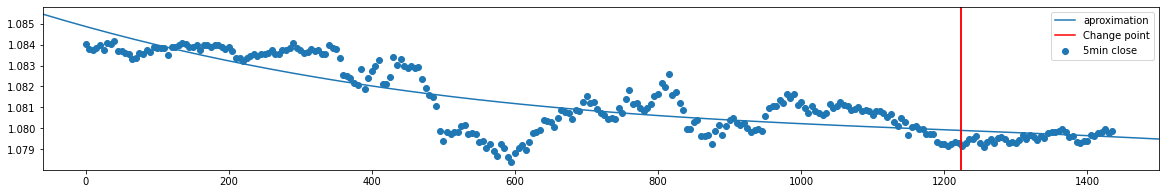

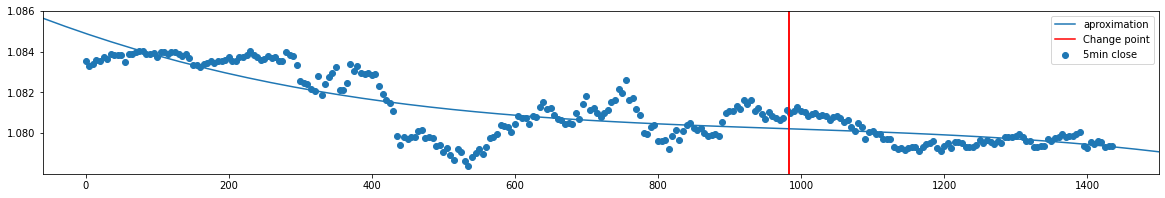

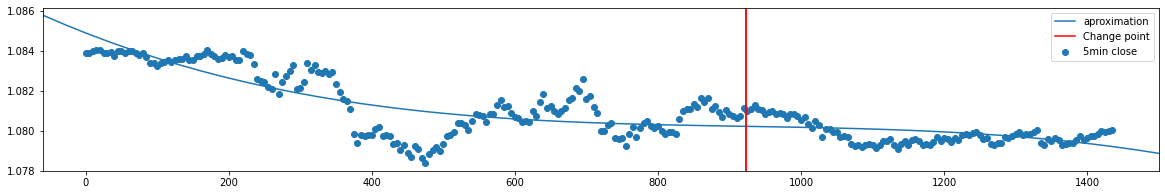

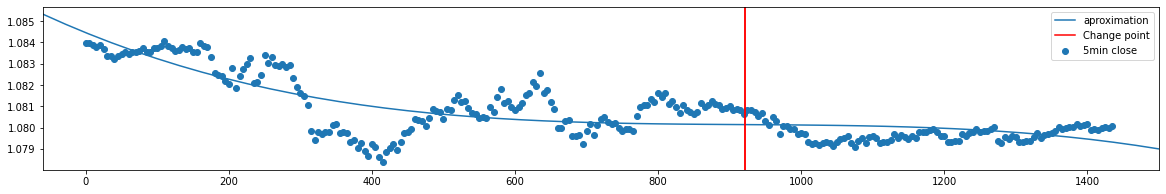

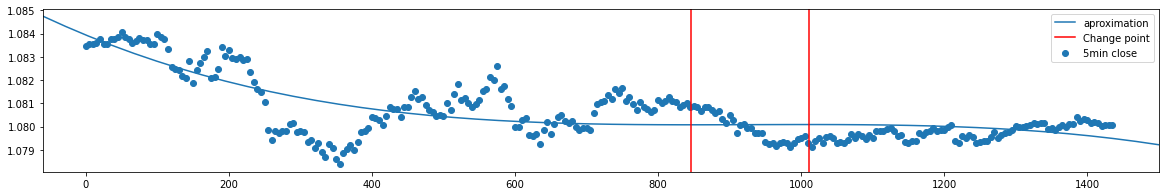

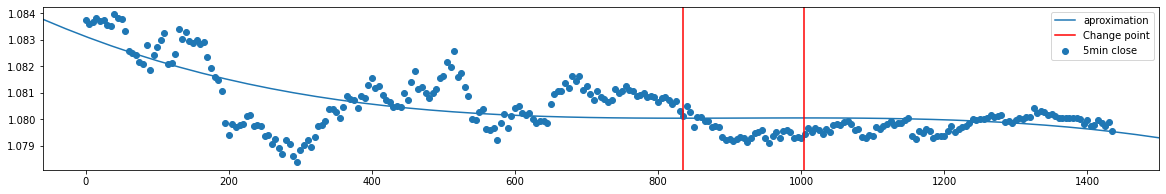

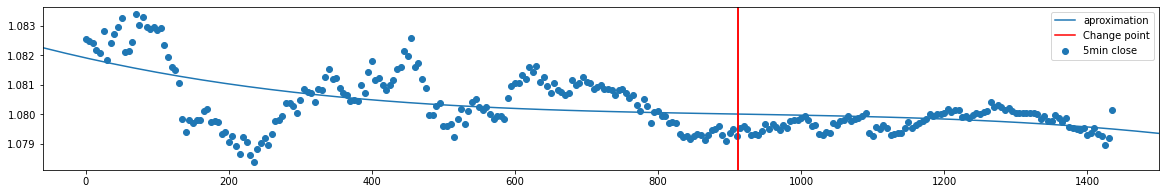

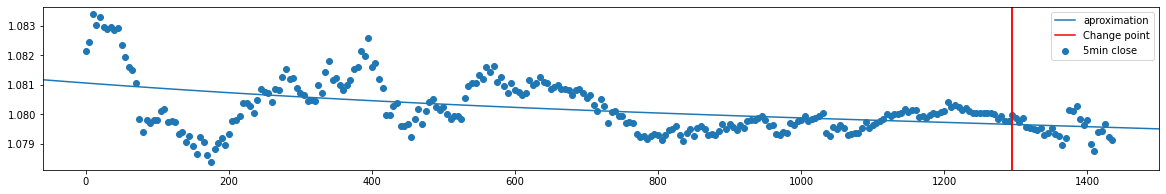

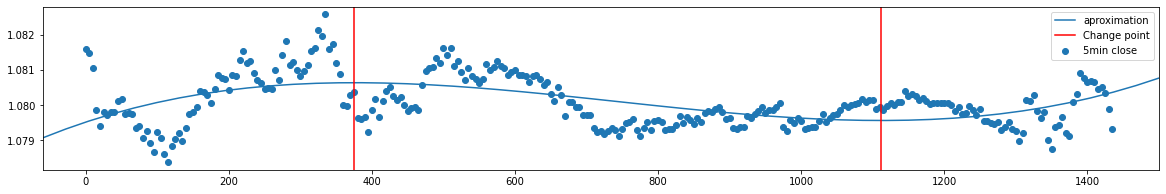

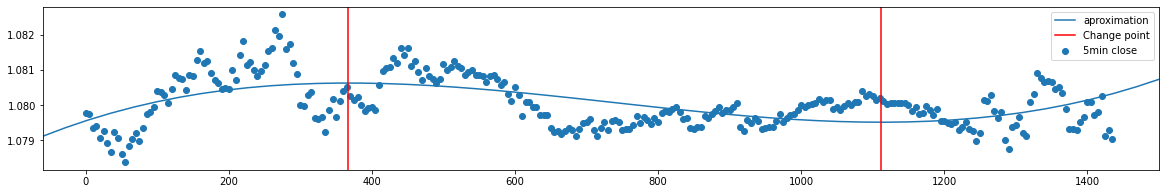

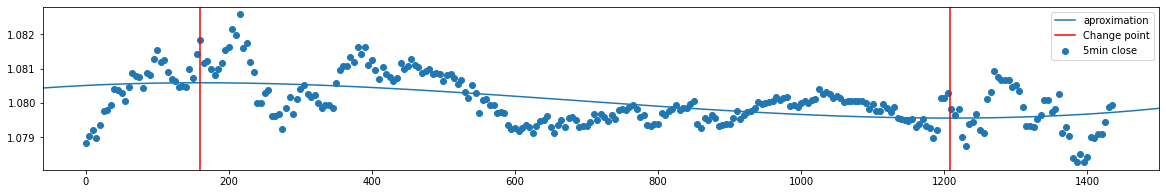

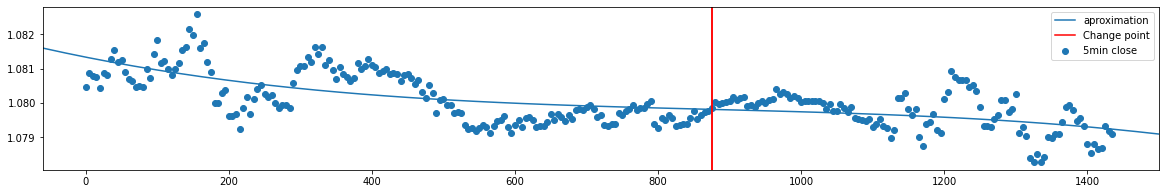

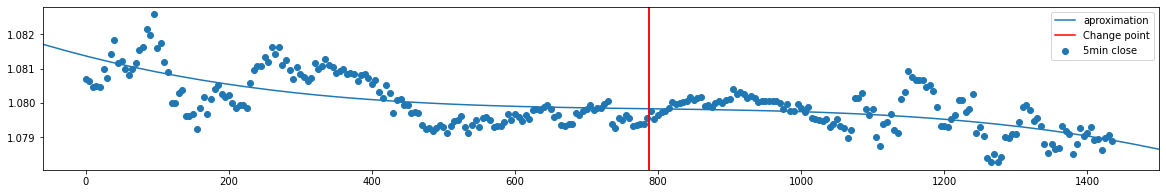

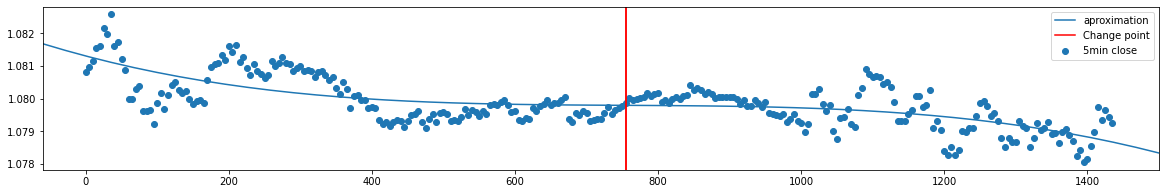

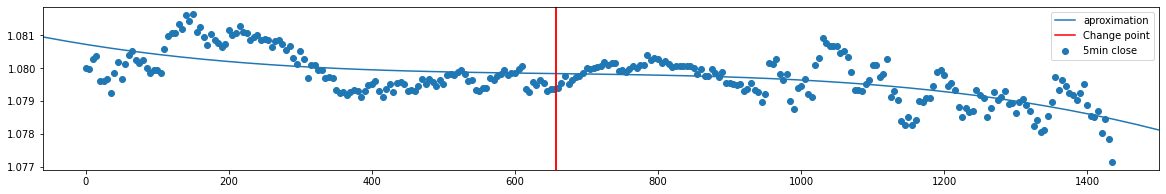

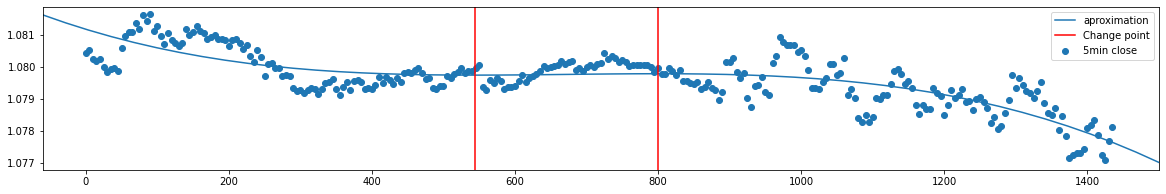

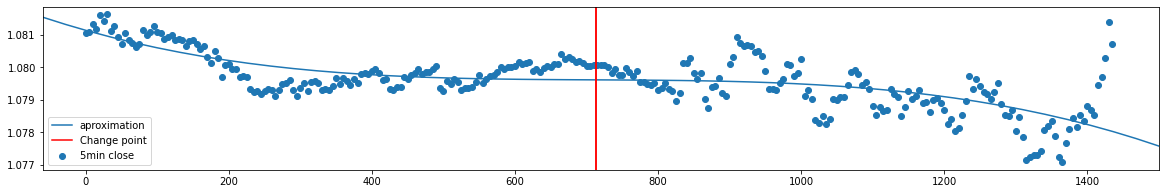

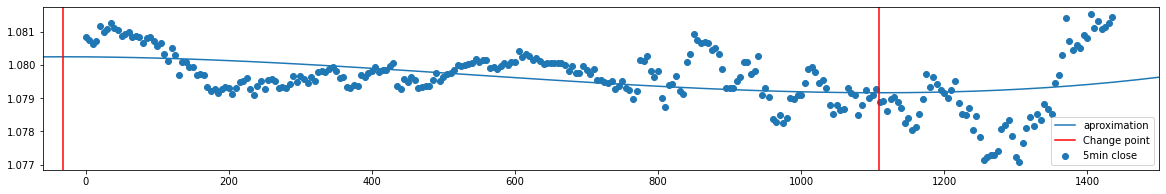

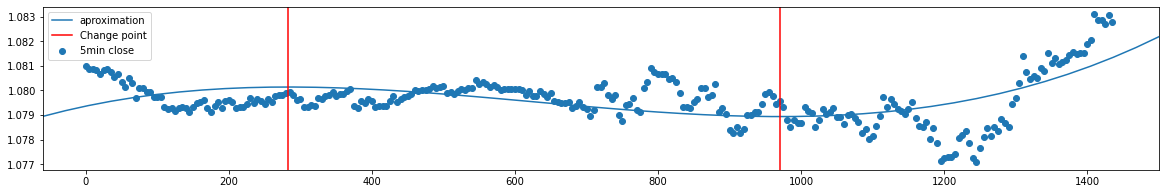

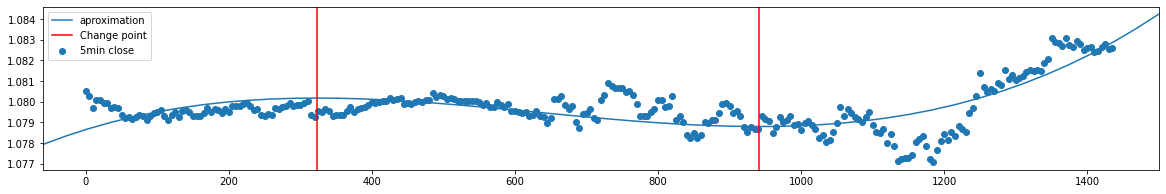

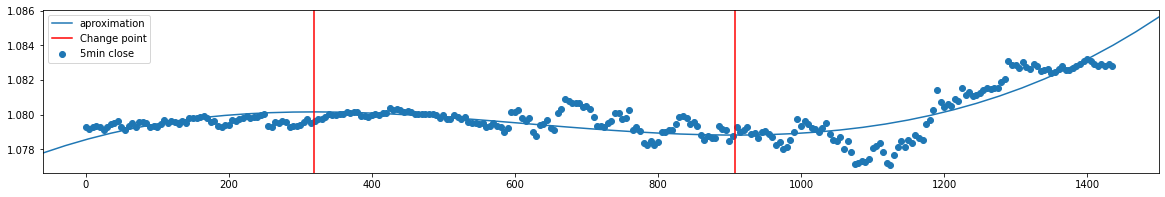

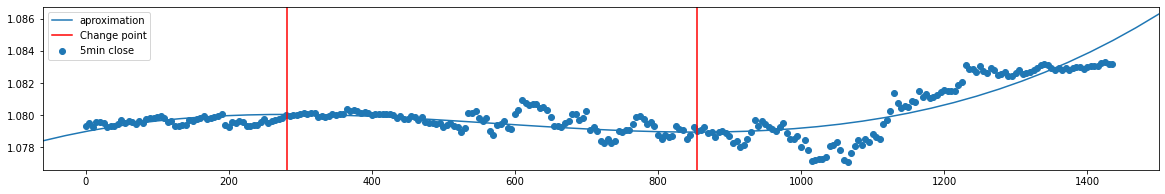

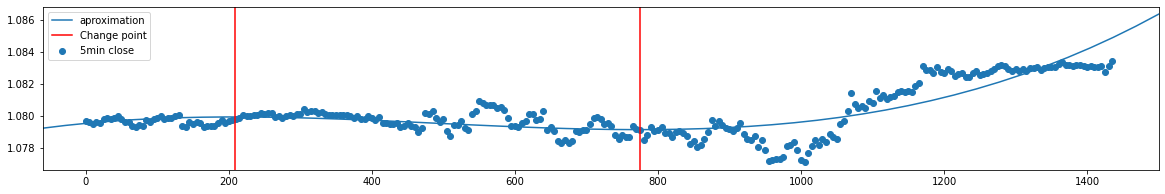

In [212]:
span = 12*24
iterations = 100

for i in range(iterations):

    ini = -span-(iterations*12-i*12)
    fin = -(iterations*12-i*12)
    lookup = 60

    x_axis = [t*5 for t in range(len(data['timestamp'][ini:fin]))]
    model = np.poly1d(np.polyfit(x_axis, data['close'][ini:fin], 3))
    polyline = np.linspace(-lookup, len(x_axis)*5+lookup)

    x = Symbol('x')

    f = model[3]*x**3 + model[2]*x**2 + model[1]*x**1 + model[0]
    f_prime = f.diff(x)
    f_prime = lambdify(x, f_prime)

    a = Poly(f.diff(x), x)
    a,b,c = a.coeffs()
    d = (b**2) - (4*a*c)  
    sol1 = (-b-cmath.sqrt(d))/(2*a)  
    sol2 = (-b+cmath.sqrt(d))/(2*a)  

    sol1 = np.real(sol1.as_real_imag())[0]
    sol2 = np.real(sol2.as_real_imag())[0]

    plt.xlim((-lookup,span*5+lookup))
    plt.scatter(x_axis, data['close'][ini:fin], label='5min close')
    plt.plot(polyline, model(polyline), label='aproximation')
    plt.axvline(sol1, color= 'red', label= 'Change point')
    plt.axvline(sol2, color= 'red')
    plt.legend()
    plt.show()